In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import pandasql
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv('C:/Users/cmscomputers/Downloads/Shark Tank India Dataset.csv')
df.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

# Checking For missing values in data

In [4]:
df.isna().sum().sum()

0

# Total number of episodes 

In [5]:
df.episode_number.max()

35

# Total number of pitches in this Season

In [6]:
no_pitch=df.groupby(by='episode_number')['pitch_number'].count().sum()
no_pitch

117

# Total number ideas got investment

In [7]:
len(df[df.deal==1].value_counts())

65

# Sharks presentee in Season

In [8]:
ashneer_present=len(df[df.ashneer_present == 1].groupby('episode_number'))
anupam_present=len(df[df.anupam_present == 1].groupby('episode_number'))
aman_present=len(df[df.aman_present == 1].groupby('episode_number'))
namita_present=len(df[df.namita_present == 1].groupby('episode_number'))
vineeta_present=len(df[df.vineeta_present == 1].groupby('episode_number'))
peyush_present=len(df[df.peyush_present == 1].groupby('episode_number'))
ghazal_present=len(df[df.ghazal_present == 1].groupby('episode_number'))

In [9]:
print('Ashneer',ashneer_present)
print('Anupam',anupam_present)
print('Aman',aman_present)
print('Namita',namita_present)
print('Vineeta',vineeta_present)
print('Peyush',peyush_present)
print('Ghazal',ghazal_present)

Ashneer 29
Anupam 35
Aman 29
Namita 32
Vineeta 20
Peyush 26
Ghazal 8


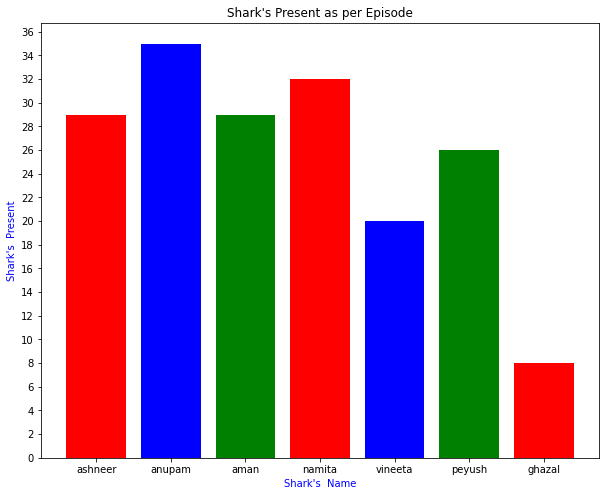

In [10]:
plt.figure(figsize=(10,8))
present=[ashneer_present,anupam_present,aman_present,namita_present,vineeta_present,peyush_present,ghazal_present]
sharks = ['ashneer','anupam','aman','namita','vineeta','peyush','ghazal']
plt.bar(sharks,present,color='rbg')
plt.xlabel("Shark's  Name",color='blue')
plt.ylabel("Shark's  Present",color='blue')
plt.yticks(range(0,38,2))
plt.title("Shark's Present as per Episode")
plt.show()

# Percentage of sharks presentee

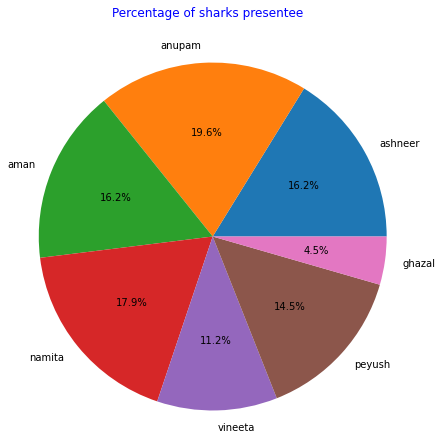

In [11]:
plt.pie(present,labels=sharks,radius=2.0,autopct='%0.1f%%')
plt.suptitle('Percentage of sharks presentee',y=1.3,color='blue')
plt.show()

# Deals Done by Sharks

In [12]:
ashneer_deal=len(df[df.ashneer_deal==1].groupby('episode_number'))
anupam_deal=len(df[df.anupam_deal==1].groupby('episode_number'))
aman_deal=len(df[df.aman_deal==1].groupby('episode_number'))
namita_deal=len(df[df.namita_deal==1].groupby('episode_number'))
vineeta_deal=len(df[df.vineeta_deal==1].groupby('episode_number'))
peyush_deal=len(df[df.peyush_deal==1].groupby('episode_number'))
ghazal_deal=len(df[df.ghazal_deal==1].groupby('episode_number'))

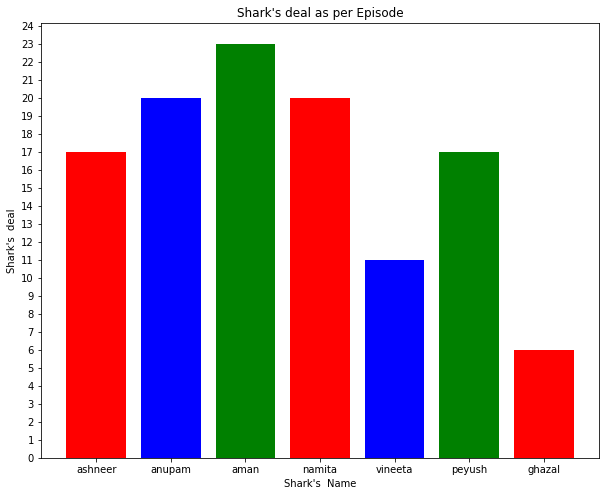

In [13]:
plt.figure(figsize=(10,8))
deal=[ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal]
sharks = ['ashneer','anupam','aman','namita','vineeta','peyush','ghazal']
plt.bar(sharks,deal,color='rbg')
plt.xlabel("Shark's  Name")
plt.ylabel("Shark's  deal")
plt.yticks(range(0,25,1))
plt.title("Shark's deal as per Episode")
plt.show()

# Percentage of sharks deals

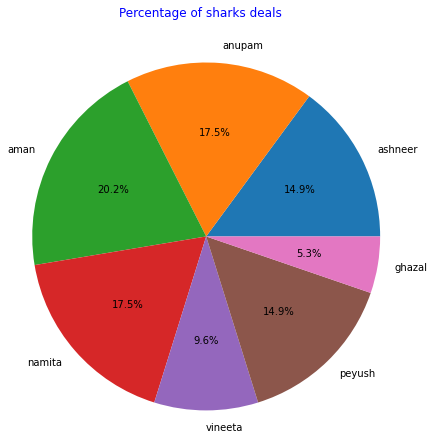

In [14]:
plt.pie(deal,labels=sharks,radius=2.0,autopct='%0.1f%%')
plt.suptitle('Percentage of sharks deals',y=1.3,color='blue')
plt.show()

# Highest Amount ask by Participant

In [15]:
df.iloc[df.pitcher_ask_amount.idxmax()][0:9]

episode_number                     11
pitch_number                       31
brand_name                 Gopal's 56
idea                  Fiber Ice Cream
deal                                0
pitcher_ask_amount            30000.0
ask_equity                       25.0
ask_valuation                120000.0
deal_amount                       0.0
Name: 30, dtype: object

# Lowest Amount ask by Participant

In [16]:
df.iloc[df.pitcher_ask_amount.idxmin()][0:9]

episode_number                         27
pitch_number                           86
brand_name             Watt Technovations
idea                  Ventilated PPE Kits
deal                                    1
pitcher_ask_amount                0.00101
ask_equity                           10.0
ask_valuation                        0.01
deal_amount                       0.00101
Name: 85, dtype: object

# Highest Equity Offered

In [17]:
df.iloc[df.deal_amount.idxmax()][0:9]

episode_number                   17
pitch_number                     51
brand_name            Aas Vidyalaya
idea                     EdTech App
deal                              1
pitcher_ask_amount            150.0
ask_equity                      3.0
ask_valuation                5000.0
deal_amount                   150.0
Name: 50, dtype: object

# Lowest Equity Offered

In [18]:
df.iloc[df.deal_amount.idxmin()][0:9]                          #it will basically fetch first no_deal data

episode_number                               2
pitch_number                                 5
brand_name                      Head and Heart
idea                  Brain Development Course
deal                                         0
pitcher_ask_amount                        50.0
ask_equity                                 5.0
ask_valuation                           1000.0
deal_amount                                0.0
Name: 4, dtype: object

# Indivisual Total Ammount Invested by a Shark

In [19]:
a=(df[df.ashneer_deal == 1].groupby('episode_number'))['amount_per_shark'].sum().sum()
print('Total amount invested by Ashneer',a/100,'cr')

Total amount invested by Ashneer 4.9433333333 cr


In [20]:
b=(df[df.anupam_deal == 1].groupby('episode_number'))['amount_per_shark'].sum().sum()
print('Total amount invested by Anupam',round(b/100,3),'cr')

Total amount invested by Anupam 5.338 cr


In [21]:
c=(df[df.aman_deal == 1].groupby('episode_number'))['amount_per_shark'].sum().sum()
print('Total amount invested by Aman',round(c/100,3),'cr')

Total amount invested by Aman 8.875 cr


In [22]:
d=(df[df.namita_deal == 1].groupby('episode_number'))['amount_per_shark'].sum().sum()
print('Total amount invested by Namita',round(d/100,3),'cr')

Total amount invested by Namita 6.483 cr


In [23]:
e=(df[df.vineeta_deal == 1].groupby('episode_number'))['amount_per_shark'].sum().sum()
print('Total amount invested by Vineta',round(e/100,3),'cr')

Total amount invested by Vineta 3.283 cr


In [24]:
f=(df[df.peyush_deal == 1].groupby('episode_number'))['amount_per_shark'].sum().sum()
print('Total amount invested by Peyush',round(f/100,3),'cr')

Total amount invested by Peyush 7.197 cr


In [25]:
g=(df[df.ghazal_deal == 1].groupby('episode_number'))['amount_per_shark'].sum().sum()
print('Total amount invested by Ghazal',round(g/100,3),'cr')

Total amount invested by Ghazal 1.3 cr


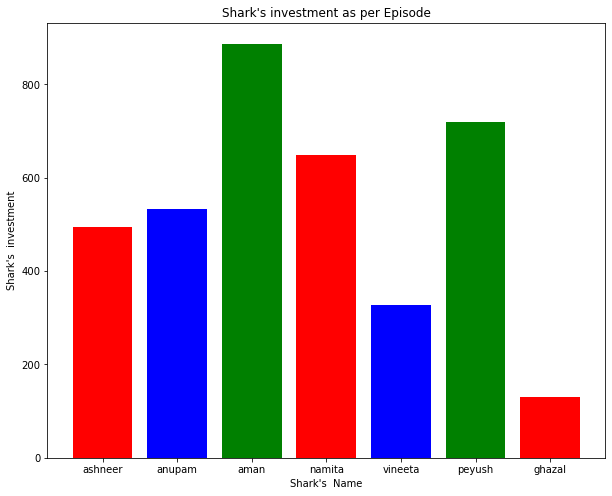

In [26]:
plt.figure(figsize=(10,8))
inv=[a,b,c,d,e,f,g]
sharks = ['ashneer','anupam','aman','namita','vineeta','peyush','ghazal']
plt.bar(sharks,inv,color='rbg')
plt.xlabel("Shark's  Name")
plt.ylabel("Shark's  investment")
plt.title("Shark's investment as per Episode")
plt.show()

# Top 20 brands which have got highest investment

In [27]:
df[['brand_name','deal_amount']].sort_values(by='deal_amount',ascending=False).head(20)

,brand_name,deal_amount
50,Aas Vidyalaya,150.0
36,Annie,105.0
12,Revamp Moto,100.0
38,The Yarn Bazaar,100.0
39,The Renal Project,100.0
42,Hammer Lifestyle,100.0
18,Raising Superstars,100.0
63,IN A CAN,100.0
64,Get a Whey,100.0
15,Skippi Pops,100.0
